<a href="https://colab.research.google.com/github/ahmabboud/Zoom-Meeting-Engagement-Recognition/blob/main/DatasetBuilder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.6/dist-packages (0.5.3)


In [ ]:
# import the necessary packages
from imutils.video import VideoStream
import argparse
import imutils
import time
import cv2
import os
import cv2
import argparse
from google.colab.patches import cv2_imshow

In [ ]:
import sys
sys.path.insert(0,'parser/directory')
from parser import *

In [ ]:
HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [ ]:
def detect(frame):
    bounding_box_cordinates, weights =  HOGCV.detectMultiScale(frame, winStride = (4, 4), padding = (8, 8), scale = 1.03)
    
    person = 1
    for x,y,w,h in bounding_box_cordinates:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        cv2.putText(frame, f'person {person}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
        person += 1
    
    cv2.putText(frame, 'Status : Detecting ', (40,40), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    cv2.putText(frame, f'Total Persons : {person-1}', (40,70), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    cv2_imshow(frame)
    return frame

In [ ]:
def humanDetector(args):
    image_path = args["image"]
    video_path = args['video']
    
    if str(args["camera"]) == 'true' : camera = True 
    else : camera = False
    writer = None
    if args['output'] is not None and image_path is None:
        writer = cv2.VideoWriter(args['output'],cv2.VideoWriter_fourcc(*'MJPG'), 10, (600,600))
    if camera:
        print('[INFO] Opening Web Cam.')
        detectByCamera(ouput_path,writer)
    elif video_path is not None:
        print('[INFO] Opening Video from path.')
        detectByPathVideo(video_path, writer)
    elif image_path is not None:
        print('[INFO] Opening Image from path.')
        detectByPathImage(image_path, args['output'])

In [ ]:
def detectByCamera(writer):   
    video = cv2.VideoCapture(0)
    print('Detecting people...')
    while True:
        check, frame = video.read()
        frame = detect(frame)
        if writer is not None:
            writer.write(frame)
        key = cv2.waitKey(1)
        if key == ord('q'):
            break
    video.release()
    cv2.destroyAllWindows()

In [ ]:
def detectByPathVideo(path, writer):
    video = cv2.VideoCapture(path)
    check, frame = video.read()
    if check == False:
        print('Video Not Found. Please Enter a Valid Path (Full path of Video Should be Provided).')
        return
    print('Detecting people...')
    while video.isOpened():
        #check is True if reading was successful 
        check, frame =  video.read()
        if check:
            frame = imutils.resize(frame , width=min(800,frame.shape[1]))
            frame = detect(frame)
            
            if writer is not None:
                writer.write(frame)
            
            key = cv2.waitKey(1)
            if key== ord('q'):
                break
        else:
            break
    video.release()
    cv2.destroyAllWindows()
def detectByCamera(writer):   
    video = cv2.VideoCapture(0)
    print('Detecting people...')
    while True:
        check, frame = video.read()
        frame = detect(frame)
        if writer is not None:
            writer.write(frame)
        key = cv2.waitKey(1)
        if key == ord('q'):
                break
    video.release()
    cv2.destroyAllWindows()

In [ ]:
def detectByPathImage(path, output_path):
    image = cv2.imread(path)
    image = imutils.resize(image, width = min(800, image.shape[1])) 
    result_image = detect(image)
    if output_path is not None:
        cv2.imwrite(output_path, result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
def argsParser():
    arg_parse = argparse.ArgumentParser()
    arg_parse.add_argument("-v", "--video", default=None, help="path to Video File ")
    arg_parse.add_argument("-i", "--image", default=None, help="path to Image File ")
    arg_parse.add_argument("-c", "--camera", default=False, help="Set true if you want to use the camera.")
    arg_parse.add_argument("-o", "--output", type=str, help="path to optional output video file")
    args = vars(arg_parse.parse_args())
    return args

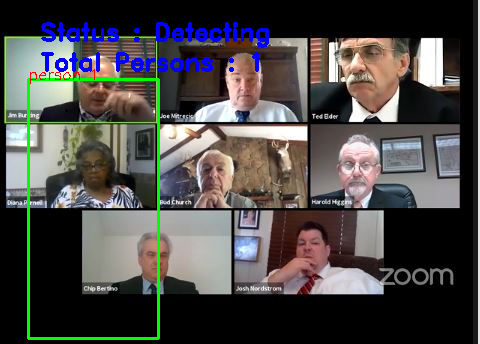

In [ ]:
#!pip install easydict
#import easydict
#easydict.EasyDict(
args = {"image":"/content/drive/My Drive/FellowAI/temp/test3.jpg",
  "video":"/content/drive/My Drive/FellowAI/temp/meetingtest2.png",
  "camera":"/content/drive/My Drive/FellowAI/temp/meetingtest2.png",
  "output":"/content/drive/My Drive/FellowAI/temp/out.png"
}
HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())  
detectByPathImage(args["image"], args['output'])